In [1]:


import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
# imports for supplemental Data
import holidays
import datetime as dt
from holidays import country_holidays
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)


In [2]:
csv = glob.glob('Data/Chicago/*.csv')
dfs=[pd.read_csv(file)for file in csv]
df=pd.concat(dfs,ignore_index=True)
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1313213,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626698
1,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
2,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.689155
3,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
4,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629


## Initial EDA

- Add holidays to df

In [3]:
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
us_holidays = country_holidays('US')

In [4]:
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
0,1313213,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626698,New Year's Day
1,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877,New Year's Day
2,1317380,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,911,9.0,NaN,41.807498,-87.689155,New Year's Day
3,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,New Year's Day
4,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629,New Year's Day


- drop any cols that will not be used to answer phrased questions.

In [5]:
df=df.drop(columns=['Latitude','Longitude','Ward','Location Description','ID'])
df.head()

,Date,Primary Type,Description,Arrest,Domestic,Beat,District,US Holiday
0,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,False,True,731,7.0,New Year's Day
1,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,False,False,1823,18.0,New Year's Day
2,01/01/2001 01:00:00 PM,CRIMINAL DAMAGE,TO VEHICLE,False,False,911,9.0,New Year's Day
3,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,False,True,825,8.0,New Year's Day
4,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,513,5.0,New Year's Day


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df = df.set_index('Date')
df.head()


,Primary Type,Description,Arrest,Domestic,Beat,District,US Holiday
Date,,,,,,,
2001-01-01 01:00:00,BATTERY,SIMPLE,False,True,731,7.0,New Year's Day
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,False,False,1823,18.0,New Year's Day
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,911,9.0,New Year's Day
2001-01-01 13:00:00,BATTERY,SIMPLE,False,True,825,8.0,New Year's Day
2001-01-01 13:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,513,5.0,New Year's Day


In [7]:
crime_counts = df['Primary Type'].value_counts().to_frame('# of Crimes')
crime_counts

,# of Crimes
THEFT,1666890
BATTERY,1442588
CRIMINAL DAMAGE,900466
NARCOTICS,749744
ASSAULT,517249
OTHER OFFENSE,490176
BURGLARY,427471
MOTOR VEHICLE THEFT,387687
DECEPTIVE PRACTICE,352588
ROBBERY,296995


- binning times for later processing

In [30]:
df['Year']  = df.index.year
df['MonthName'] = df.index.month_name()
df['HourOfDay'] = df.index.hour 
df.head()



,Primary Type,Description,Arrest,Domestic,Beat,District,US Holiday,Year,MonthName,HourOfDay
Date,,,,,,,,,,
2001-01-01 01:00:00,BATTERY,SIMPLE,False,True,731,7.0,New Year's Day,2001,January,1
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,False,False,1823,18.0,New Year's Day,2001,January,1
2001-01-01 13:00:00,CRIMINAL DAMAGE,TO VEHICLE,False,False,911,9.0,New Year's Day,2001,January,13
2001-01-01 13:00:00,BATTERY,SIMPLE,False,True,825,8.0,New Year's Day,2001,January,13
2001-01-01 13:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,False,False,513,5.0,New Year's Day,2001,January,13


## Q1 tester

- Topic 1) Comparing Police Districts:
    - Which district has the most crimes? Which has the least?


In [70]:
dist= df.groupby('District')['Primary Type'].value_counts().sort_index()
plot_dist=dist.to_frame('# of crimes').reset_index()


In [83]:
combined=plot_dist.groupby('District').agg({
    #'Primary Type': ', '.join,
    '# of crimes':'sum'
}).reset_index()


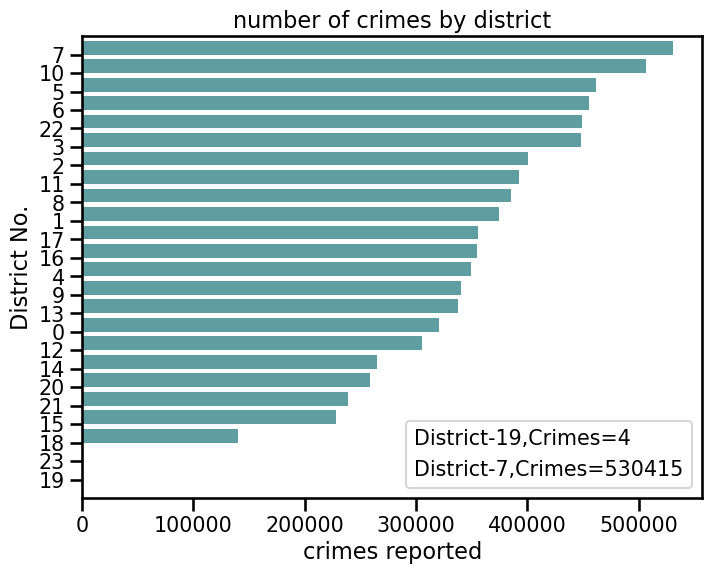

In [104]:
# identify numeric max's for plot legend 
max_id=combined['# of crimes'].idxmax()
max_value=combined['# of crimes'].max()
# identify numeric mins for plot legend
min_id=combined['# of crimes'].idxmin()
min_value=combined['# of crimes'].min()

# set labels f strings for legend
labels=[f'District-{min_id},Crimes={min_value}',f'District-{max_id},Crimes={max_value}']

# plot results
ax=combined.sort_values(by='# of crimes').plot(kind='barh',width=1.5, color='cadetblue' ,figsize=(8,6))
ax.set(title='number of crimes by district', xlabel='crimes reported', ylabel= 'District No.')
ax.legend(labels,handlelength=0, handletextpad=0);

## topics of choice


- Topic 1) Comparing Police Districts:
    - Which district has the most crimes? Which has the least?


- Topic 4) Comparing Months:
    - What months have the most crime? What months have the least?
    - Are there any individual crimes that do not follow this pattern? If so, which crimes?

- Topic 5) Comparing Holidays:
    - Are there any holidays that show an increase in the # of crimes?
    - Are there any holidays that show a decrease in the # of crimes?


